In [10]:
import pandas as pd

In [11]:
import tweepy

In [19]:
consumer_key = "D2CU1ganhMNlIsGg5uSA0vqyg"

In [20]:
consumer_secret = "qtOhQ63NTkHcojQYbj43OPR9FltpBzfXs5fVNlIzYhR3t4tkxF"

In [21]:
access_key = "1164538827777593344-ImvywLNVup4opxe4lGeczxUX6R64Sb"

In [22]:
access_secret = "w1DvHtq2kYVuY2swbJn3f3GtnkPATCm1BsQzLzzoLJdPq"

In [23]:
def get_all_tweets(screen_name):
    auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
    auth.set_access_token(access_key, access_secret)
    api = tweepy.API(auth)
    alltweets = []
    new_tweets = api.user_timeline(screen_name = screen_name,count=200)
    alltweets.extend(new_tweets)
    
    oldest = alltweets[-1].id-1
    while len(new_tweets)>0:
        new_tweets = api.user_timeline(screen_name = screen_name,count=200,max_id=oldest)
        #save most recent tweets
        alltweets.extend(new_tweets)
        #update the id of the oldest tweet less one
        oldest = alltweets[-1].id - 1
        print ("...%s tweets downloaded so far" % (len(alltweets)))                # tweet.get('user', {}).get('location', {})
 
    outtweets = [[tweet.created_at,tweet.entities["hashtags"],tweet.entities["user_mentions"],tweet.favorite_count,
                  tweet.geo,tweet.id_str,tweet.lang,tweet.place,tweet.retweet_count,tweet.retweeted,tweet.source,tweet.text,
                  tweet._json["user"]["location"],tweet._json["user"]["name"],tweet._json["user"]["time_zone"],
                  tweet._json["user"]["utc_offset"]] for tweet in alltweets]
    
    import pandas as pd
    tweets_df = pd.DataFrame(columns = ["time","hashtags","user_mentions","favorite_count",
                                    "geo","id_str","lang","place","retweet_count","retweeted","source",
                                    "text","location","name","time_zone","utc_offset"])
    tweets_df["time"]  = pd.Series([str(i[0]) for i in outtweets])
    tweets_df["hashtags"] = pd.Series([str(i[1]) for i in outtweets])
    tweets_df["user_mentions"] = pd.Series([str(i[2]) for i in outtweets])
    tweets_df["favorite_count"] = pd.Series([str(i[3]) for i in outtweets])
    tweets_df["geo"] = pd.Series([str(i[4]) for i in outtweets])
    tweets_df["id_str"] = pd.Series([str(i[5]) for i in outtweets])
    tweets_df["lang"] = pd.Series([str(i[6]) for i in outtweets])
    tweets_df["place"] = pd.Series([str(i[7]) for i in outtweets])
    tweets_df["retweet_count"] = pd.Series([str(i[8]) for i in outtweets])
    tweets_df["retweeted"] = pd.Series([str(i[9]) for i in outtweets])
    tweets_df["source"] = pd.Series([str(i[10]) for i in outtweets])
    tweets_df["text"] = pd.Series([str(i[11]) for i in outtweets])
    tweets_df["location"] = pd.Series([str(i[12]) for i in outtweets])
    tweets_df["name"] = pd.Series([str(i[13]) for i in outtweets])
    tweets_df["time_zone"] = pd.Series([str(i[14]) for i in outtweets])
    tweets_df["utc_offset"] = pd.Series([str(i[15]) for i in outtweets])
    tweets_df.to_csv(screen_name+"_tweets.csv")
    return tweets_df

In [24]:
srt = get_all_tweets("sachin_rt")

...400 tweets downloaded so far
...600 tweets downloaded so far
...800 tweets downloaded so far
...1000 tweets downloaded so far
...1200 tweets downloaded so far
...1400 tweets downloaded so far
...1600 tweets downloaded so far
...1800 tweets downloaded so far
...2000 tweets downloaded so far
...2200 tweets downloaded so far
...2400 tweets downloaded so far
...2600 tweets downloaded so far
...2800 tweets downloaded so far
...3000 tweets downloaded so far
...3137 tweets downloaded so far
...3137 tweets downloaded so far


In [25]:
srt1 =srt.iloc[:,11]

In [26]:
srt1 =list(srt1)

In [27]:
srt_string =' '.join(srt1)

In [28]:
import re

In [29]:
srt_string = re.sub("[^A-Za-z" "]+"," ",srt_string).lower()

In [30]:
srt_string = re.sub("[0-9" "]+"," ",srt_string)

In [31]:
srt_words = srt_string.split(" ")

In [32]:
from nltk.corpus import stopwords

In [34]:
with open("C:/Users/elcot/Downloads/stop.txt","r") as sw:
    stopwords = sw.read()

In [35]:
stopwords = stopwords.split("\n")

In [36]:
temp = ["this","is","awsome","Data","Science"]
[i for i in temp if i not in "is"]

['this', 'awsome', 'Data', 'Science']

In [37]:
srt_words = [w for w in srt_words if not w in stopwords]

In [38]:
srt_string = " ".join(srt_words)

In [39]:
import matplotlib.pyplot as plt

In [40]:
from wordcloud import WordCloud

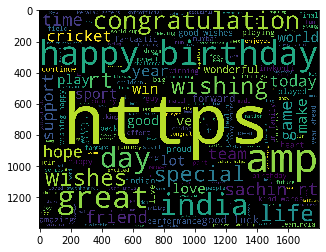

In [41]:
wordcloud= WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(srt_string)

plt.imshow(wordcloud)

In [42]:
with open("C:/Users/elcot/Downloads/positive-words.txt","r") as pos:
  poswords = pos.read().split("\n")

In [43]:
poswords = poswords[36:]

In [44]:
with open("C:/Users/elcot/Downloads/negative-words.txt","r") as neg:
  negwords = neg.read().split("\n")

In [45]:
negwords = negwords[37:]

In [46]:
neg_in_neg = " ".join ([w for w in srt_words if w in negwords])

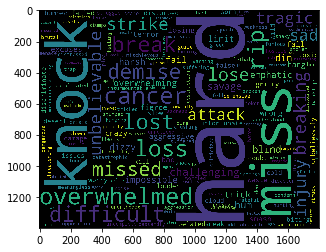

In [47]:
wordcloud_neg_in_neg = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(neg_in_neg)

plt.imshow(wordcloud_neg_in_neg)

In [48]:
pos_in_pos = " ".join ([w for w in srt_words if w in poswords])

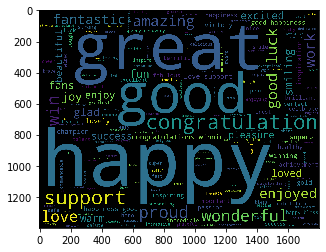

In [49]:
wordcloud_pos_in_pos = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(pos_in_pos)

plt.imshow(wordcloud_pos_in_pos)